In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data1 = pd.read_csv('exp1.csv')
data1.head()

,input,output
0,8,81
1,6,61
2,5,51
3,9,91
4,2,21


In [ ]:
X = data1[['input']].values
X

array([[8],
       [6],
       [5],
       [9],
       [2],
       [4],
       [3],
       [1],
       [7]])

In [ ]:
Y = data1[["output"]].values
Y

array([[81],
       [61],
       [51],
       [91],
       [21],
       [41],
       [31],
       [11],
       [71]])

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
scalar=MinMaxScaler()
scalar.fit(X_train)
scalar.fit(X_test)

MinMaxScaler()

In [ ]:
X_train=scalar.transform(X_train)
X_test=scalar.transform(X_test)

In [ ]:
import tensorflow as tf

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Dense(4,activation='relu'),
                          tf.keras.layers.Dense(5,activation='relu'),
                          tf.keras.layers.Dense(1)])

In [ ]:
model.compile(loss="mae",optimizer="rmsprop",metrics=["mse"])

In [ ]:
history=model.fit(X_train,Y_train,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 756ms/step - loss: 54.9510 - mse: 3606.5603
Epoch 2/1000
1/1 [==============================] - 0s 16ms/step - loss: 54.9259 - mse: 3603.4700
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 54.9073 - mse: 3601.1797
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 54.8915 - mse: 3599.2312
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 54.8772 - mse: 3597.4800
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 54.8640 - mse: 3595.8560
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 54.8515 - mse: 3594.3228
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 54.8396 - mse: 3592.8560
Epoch 9/1000
1/1 [==============================] - 0s 16ms/step - loss: 54.8281 - mse: 3591.4399
Epoch 10/1000
1/1 [==============================] - 0s 20ms/step - loss: 54.8169 - mse: 3590.0630
Epoch 11/1000
1/1 [===

In [ ]:
import numpy as np

In [ ]:
X_test
preds=model.predict(X_test)

In [ ]:
np.round(preds)
tf.round(model.predict([[20]]))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[533.]], dtype=float32)>

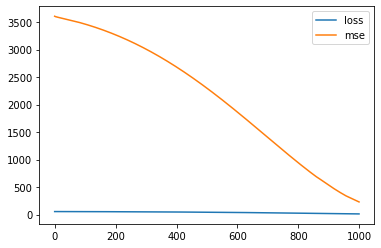

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
r=tf.keras.metrics.RootMeanSquaredError()
r(Y_test,preds)

<tf.Tensor: shape=(), dtype=float32, numpy=199.2153>